In [97]:
import pandas as pd
import random
from copy import deepcopy
from scipy.linalg import svd, diagsvd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [118]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df = df[df['bmi'].notna()]

df_features = df[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
# df_features = df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]
df_features = pd.get_dummies(df_features)
df_outcome = df[['stroke']]
df_outcome = pd.get_dummies(df_outcome)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_outcome, train_size=0.5)

In [120]:
tree = DecisionTreeClassifier(criterion='entropy')
tree = tree.fit(X_train, y_train)

In [121]:
y_estimado = tree.predict(X_test)

accur = accuracy_score(y_estimado,y_test)
accur

0.9230142566191446

In [122]:
#hipotese nula (classificador que só chuta 0)
y_so_0 = np.array([0 for i in range(len(y_estimado))])
accur_0 = accuracy_score(y_so_0,y_test)
accur_0


0.9531568228105907

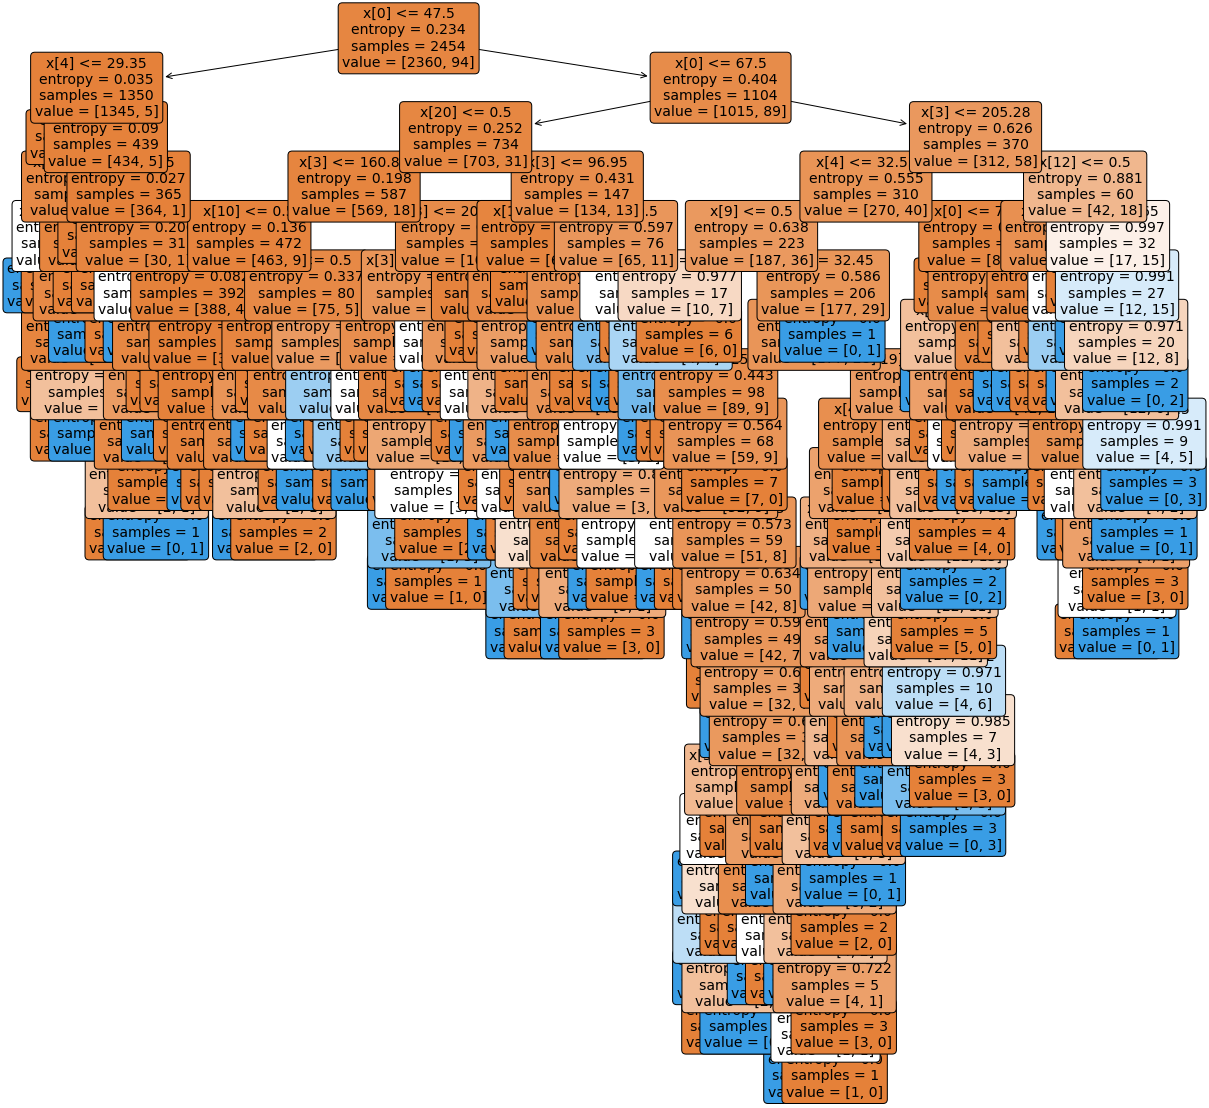

In [123]:
plt.figure(figsize=(20, 20))
plot_tree(tree, filled=True, rounded=True, fontsize=14)
plt.show()